# Students : Hazim Benslimane, Christopher Jabea, Dylan Rachwal, Alexandre Thouvenot 

## Project of Machine learning for classification on the 2 datasets Banknote Authentication and Chronic Kidney Disease

In [2]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from graphviz import Source
from functions import *


mpl.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


# Import Dataset Banknote

In [7]:
columns_name = ['variance', 'skewness','curtosis','entropy','class']
X,Y,class_labels = load_data("data_banknote_authentication.txt", False, columns_name)
X = min_max_normalization(X)

In [10]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 900)

## PCA

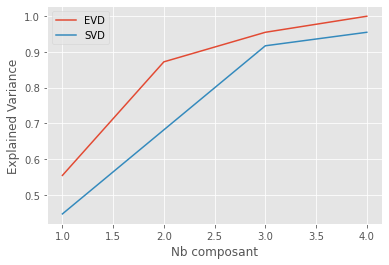

In [11]:
# PCA based on EVD decomposition
pca_evd = PCA_dec(X)

# PCA based on SVD decompostion 
pca_svd = PCA(n_components=4)
pca_svd.fit(X)

plt.plot(range(1,5), pca_evd.exp_variance(), label="EVD")
plt.plot(range(1,5), 1-pca_svd.explained_variance_ratio_, label="SVD")
plt.xlabel('Nb composant')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

In [12]:
X_pca_2 = pca_evd.PCA_decomposition(2)

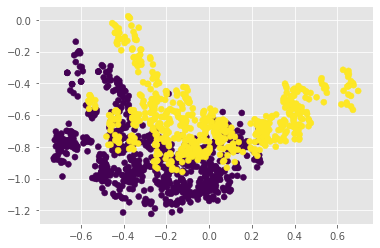

In [13]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=Y)
plt.show()

In [7]:
X_pca_3 = pca_evd.PCA_decomposition(3)

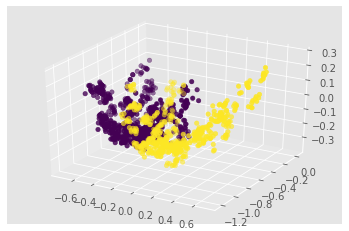

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], c=Y)
plt.show()

## KNN Analysis

In [39]:
X_train.values[[0,1,2],:]

array([[0.7680015 , 0.77197125, 0.17765094, 0.80294152],
       [0.37781335, 0.95996962, 0.31584638, 0.29782591],
       [0.77783066, 0.5451021 , 0.26900769, 0.86889986]])

# Complete

In [20]:
Y_pred = predict_SVC(X_train, X_test, Y_train)

In [21]:
precisions, recalls = precision_recall_multilabels(Y_test,Y_pred[1],class_labels)
print(precisions)
print(recalls)

[[1. 1.]]
[[1. 1.]]


In [22]:
tab_log_tree = find_best_depths(X,Y,cvp=True)

Text(0, 0.5, 'Negative Log Loss')

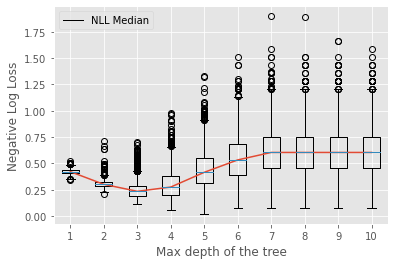

In [23]:
plt.boxplot(tab_log_tree)
plt.plot(linspace(1, 10, 10),[np.median(x) for x in tab_log_tree])
plt.legend(['NLL Median'])
xlabel('Max depth of the tree')
ylabel('Negative Log Loss')

In [22]:
class_forest = RandomForestClassifier(max_depth=3, n_estimators=1000)
class_forest.fit(X, Y)
pred_forest = class_forest.predict(X)



ValueError: could not convert string to float: 'normal'

## Import Dataset Kidney disease

In [24]:
X,Y,class_labels = load_data("kidney_disease.csv", True)
print(X.shape)
print(Y)

(400, 25)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, 200)

In [26]:
Y_pred = predict_SVC(X_train, X_test, Y_train)

In [27]:
precisions, recalls = precision_recall_multilabels(Y_test,Y_pred[1],class_labels)
print(precisions)
print(recalls)

[[0.99236641 1.        ]]
[[1.         0.98571429]]


In [31]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([1.    , 1.    , 1.    , 0.9875, 0.9625])

In [33]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01


In [43]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=41)
scores = cross_validate(clf, X, Y, cv = 10,  scoring=scoring)

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std()))

0.99 accuracy with a standard deviation of 0.01


# KNN clustering